In [7]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [8]:
X_b = np.c_[np.ones((100, 1)), X] # add xθ+1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best

array([[4.31053889],
       [2.64519299]])

In [10]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add xθ+1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.31053889],
       [9.60092487]])

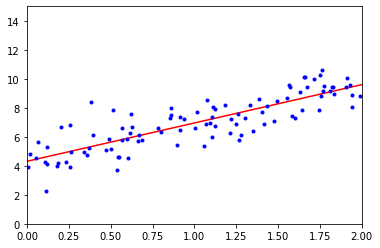

In [13]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [15]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.31053889]), array([[2.64519299]]))

In [16]:
lin_reg.predict(X_new)

array([[4.31053889],
       [9.60092487]])

In [17]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [18]:
theta_best_svd

array([[4.31053889],
       [2.64519299]])

In [19]:
np.linalg.pinv(X_b).dot(y)

array([[4.31053889],
       [2.64519299]])

In [26]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [27]:
theta

array([[4.31053889],
       [2.64519299]])

In [28]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [29]:
theta

array([[4.32909956],
       [2.68312608]])

In [31]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [32]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.29889793]), array([2.6499805]))